In [1]:
import pylab as pl 
import numpy as np
%pylab inline 

from __future__ import print_function
__author__ = "mf3358"

import json 
import os 
from scipy.optimize import curve_fit, minimize


Populating the interactive namespace from numpy and matplotlib


In [162]:
# generate population mean
pmean = 150

# a CHI SQUARED distribution (1/6)
xdf = 150
md={}
md['chisq'] = np.random.chisquare(xdf, size=100)

In [163]:
distributions = ['chisq', 'norm', 'pois', 'binom', 'logn', 'pareto']

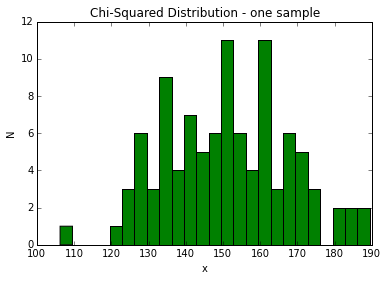

In [164]:
pl.hist(md['chisq'],bins=25, color = 'green')
pl.title ('Chi-Squared Distribution - one sample')
pl.ylabel('N')
pl.xlabel('x')

In [165]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 151.09, standard deviation: 16.69


In [154]:
#mysize=1000/(np.array(range(1,100)))
mysize=1000/(np.array(range(1,100)+[10]))
#mysize=(np.random.rand(100)*1000).astype(int)
#print (mysize, mysize.shape)
scale = np.random.rand()

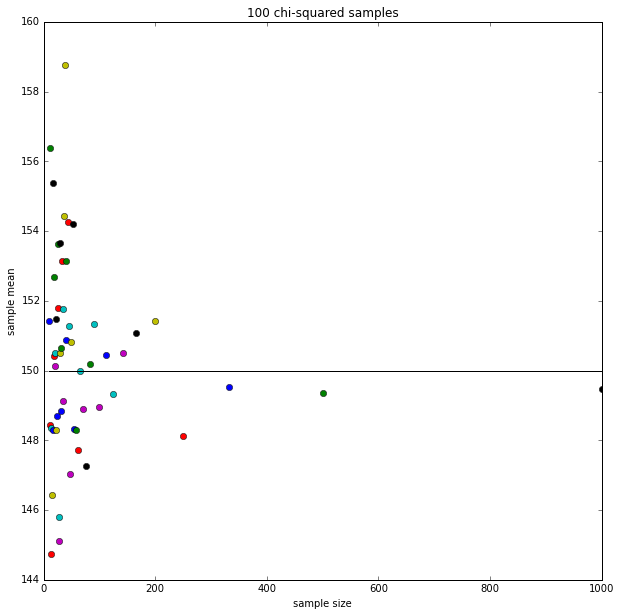

In [315]:
#overwrite dictionary
md['chisq']={} 

for n in mysize:
    md['chisq'][n] = np.random.chisquare(xdf, size=n)
    
means = {}
means['chisq'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['chisq'].iterkeys():
    means['chisq'][nn] = md['chisq'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['chisq'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.set_title ('100 chi-squared samples')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[xdf,xdf], 'k')

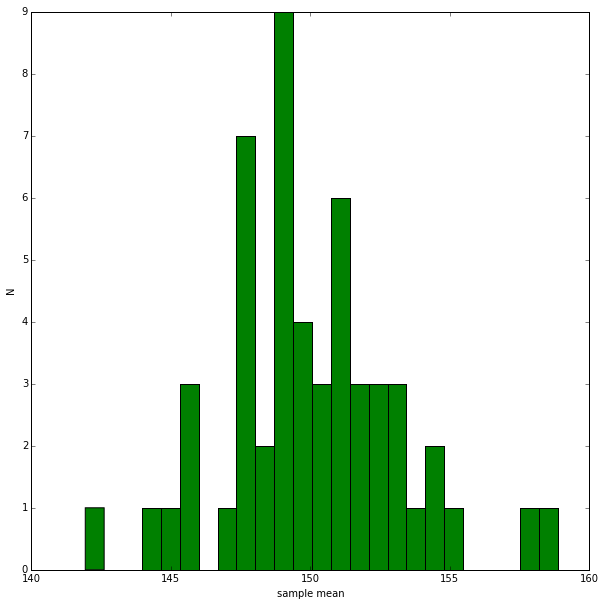

In [181]:
#plot histogram of 100 sample means
allmeans=[]
for n in means['chisq']:
    allmeans.append(means['chisq'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=25, color='green')
pl.xlabel('sample mean')
pl.ylabel('N')

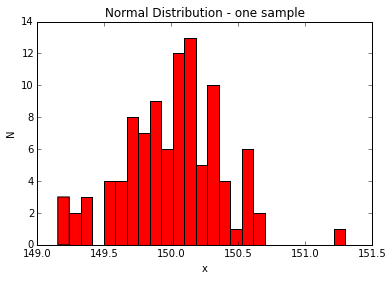

In [167]:
# a NORMAL distribution (2/6)
md['norm'] = np.random.normal(pmean, scale, size=100)
pl.hist(md['norm'], bins=25, color = 'red')
pl.title ('Normal Distribution - one sample')
pl.ylabel('N')
pl.xlabel('x')

In [156]:
print ("Normal Mean: %.2f, standard deviation: %.2f"%(md['norm'].mean(), md['norm'].std()))

Normal Mean: 150.02, standard deviation: 0.35


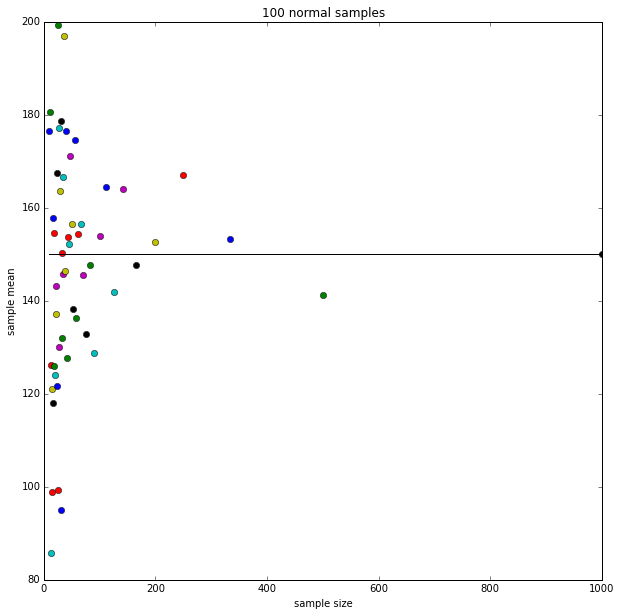

In [184]:
mysize=1000/(np.array(range(1,100)+[10]))

nsd = np.std(mysize) # calculate standard deviation of all 100 samples

md['norm']={} 

for n in mysize:
    md['norm'][n] = np.random.normal(150, nsd, size=n) # mean, standard deviation, size
    
means = {}
means['norm'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axnorm_mu_n = fig_mu_N.add_subplot(111)
for nn in md['norm'].iterkeys():
    means['norm'][nn] = md['norm'][nn].mean()
    # plot it
    axnorm_mu_n.plot(nn, means['norm'][nn], 'o')
    axnorm_mu_n.set_xlabel('sample size')
    axnorm_mu_n.set_ylabel('sample mean')
    axnorm_mu_n.set_title ('100 normal samples')
    axnorm_mu_n.plot([min(mysize), max(mysize)], [xdf, xdf],'k') 

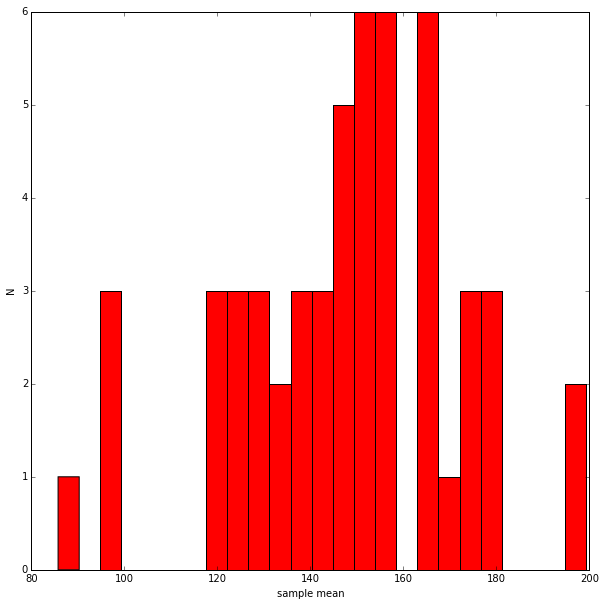

In [185]:
# plotting means of 100 normal distribution samples
allmeans=[]
for n in means['norm']:
    allmeans.append(means['norm'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=25, color='red')
pl.xlabel('sample mean')
pl.ylabel('N')

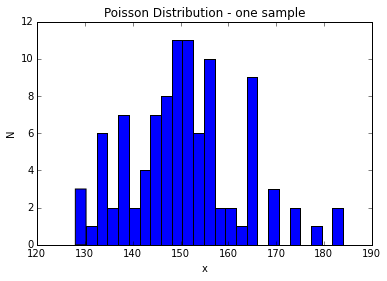

In [183]:
# a POISSON distribution (3/6)
md['pois'] = np.random.poisson(pmean, size=100)
pl.hist(md['pois'], bins=25, color = 'blue')
pl.title ('Poisson Distribution - one sample')
pl.ylabel('N')
pl.xlabel('x')

In [174]:
print ("Poisson Mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson Mean: 151.61, standard deviation: 12.22


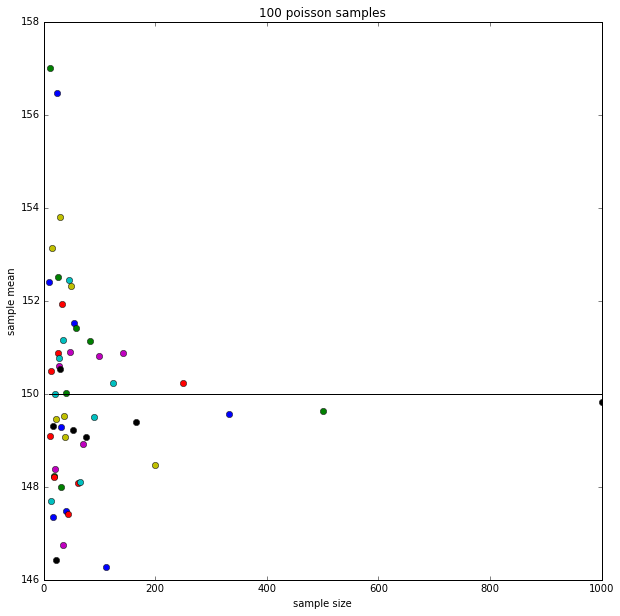

In [193]:
mysize=1000/(np.array(range(1,100)+[10]))

md['pois']={} 

for n in mysize:
    md['pois'][n] = np.random.poisson(150, size=n) 
    
means = {}
means['pois'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axpois_mu_n = fig_mu_N.add_subplot(111)
for nn in md['pois'].iterkeys():
    means['pois'][nn] = md['pois'][nn].mean()
    # plot it
    axpois_mu_n.plot(nn, means['pois'][nn], 'o')
    axpois_mu_n.set_xlabel('sample size')
    axpois_mu_n.set_ylabel('sample mean')
    axpois_mu_n.set_title ('100 poisson samples')
    axpois_mu_n.plot([min(mysize), max(mysize)], [xdf, xdf], 'k')

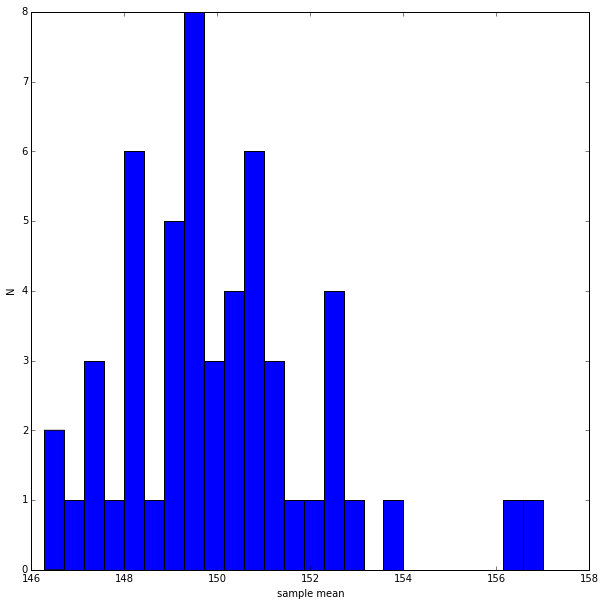

In [194]:
# plot means of 100 samples
allmeans=[]
for n in means['pois']:
    allmeans.append(means['pois'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=25, color='blue')
pl.xlabel('sample mean')
pl.ylabel('N')

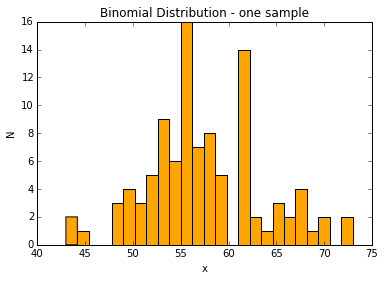

In [201]:
# a BINOMIAL distribution (4/6)
md['binom'] = np.random.binomial(pmean, scale, size=100)
pl.hist(md['binom'], bins=25, color = 'orange')
pl.title ('Binomial Distribution - one sample')
pl.ylabel('N')
pl.xlabel('x')

In [202]:
print ("Binomial Mean: %.2f, standard deviation: %.2f"%(md['binom'].mean(), md['binom'].std())) 
# not getting population mean here and not entirely sure why

Binomial Mean: 57.44, standard deviation: 6.04


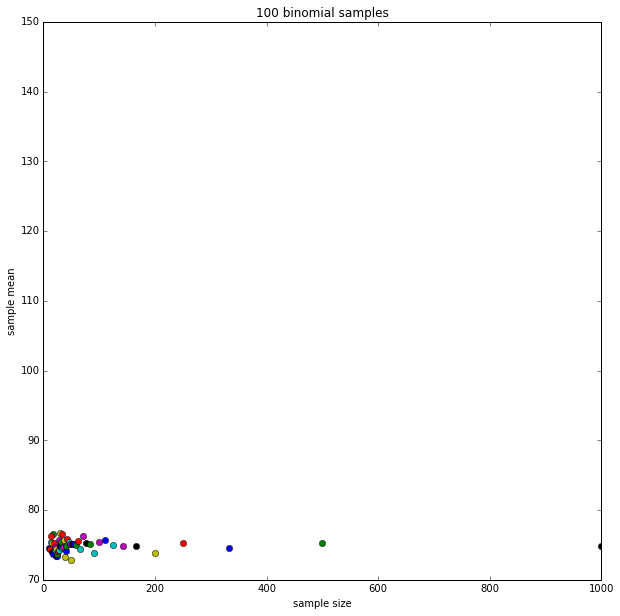

In [203]:
md['binom']={} 

for n in mysize:
    md['binom'][n] = np.random.binomial(150, .5, size=n)
    
means = {}
means['binom'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axbinom_mu_n = fig_mu_N.add_subplot(111)
for nn in md['binom'].iterkeys():
    means['binom'][nn] = md['binom'][nn].mean()
    # plot it
    axbinom_mu_n.plot(nn, means['binom'][nn], 'o')
    axbinom_mu_n.set_xlabel('sample size')
    axbinom_mu_n.set_ylabel('sample mean')
    axbinom_mu_n.set_title ('100 binomial samples')
    axbinom_mu_n.plot([min(mysize), max(mysize)], [xdf, xdf], 'k')

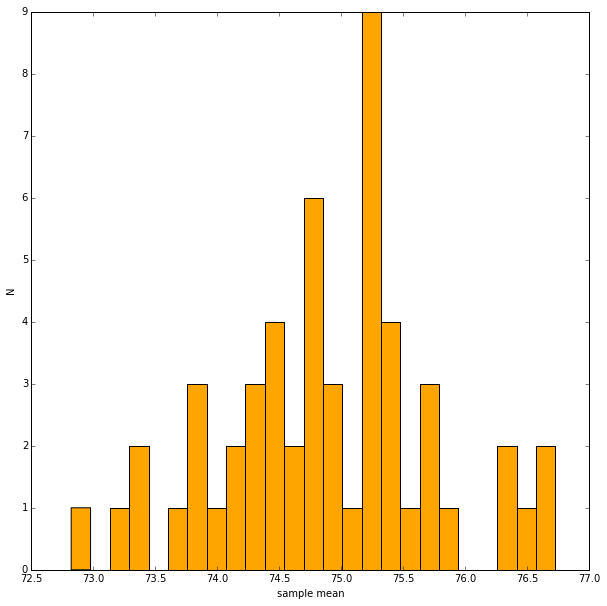

In [204]:
allmeans=[]
for n in means['binom']:
    allmeans.append(means['binom'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=25, color='orange')
pl.xlabel('sample mean')
pl.ylabel('N')

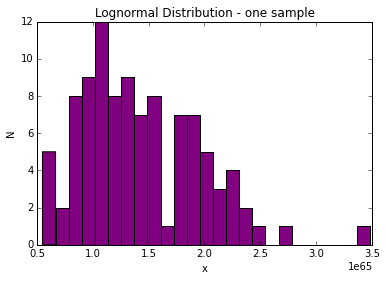

In [205]:
# a LOGNORMAL distribution (5/6)
md['logn'] = np.random.lognormal(150, scale, size=100)
pl.hist(md['logn'], bins=25, color = 'purple')
pl.title ('Lognormal Distribution - one sample')
pl.ylabel('N')
pl.xlabel('x')

In [206]:
print ("Lognormal Mean: %.2f, standard deviation: %.2f"%(md['logn'].mean(), md['logn'].std())) 

Lognormal Mean: 143043715168597156370598864977019296924030940759835613955132227584.00, standard deviation: 53122637996824753352566125450686856472548328070520972457476620288.00


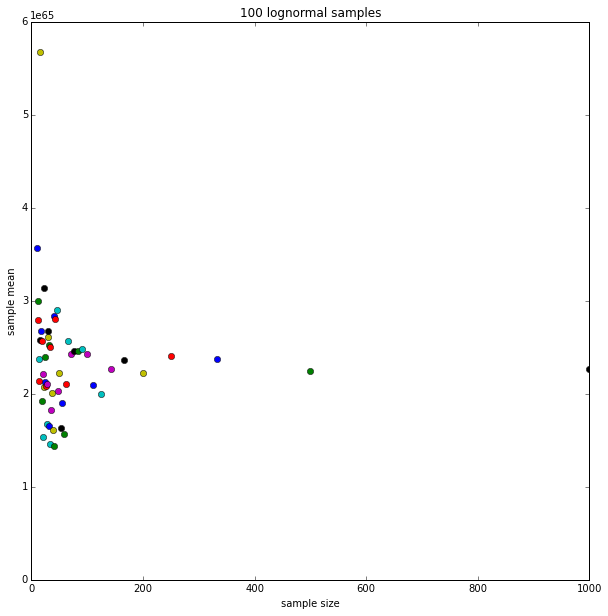

In [207]:
md['logn']={} 

for n in mysize:
    md['logn'][n] = np.random.lognormal(150, 1, size=n)
    
means = {}
means['logn'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axlogn_mu_n = fig_mu_N.add_subplot(111)
for nn in md['logn'].iterkeys():
    means['logn'][nn] = md['logn'][nn].mean()
    # plot it
    axlogn_mu_n.plot(nn, means['logn'][nn], 'o')
    axlogn_mu_n.set_xlabel('sample size')
    axlogn_mu_n.set_ylabel('sample mean')
    axlogn_mu_n.set_title ('100 lognormal samples')
    axlogn_mu_n.plot([min(mysize), max(mysize)], [xdf, xdf], 'k')

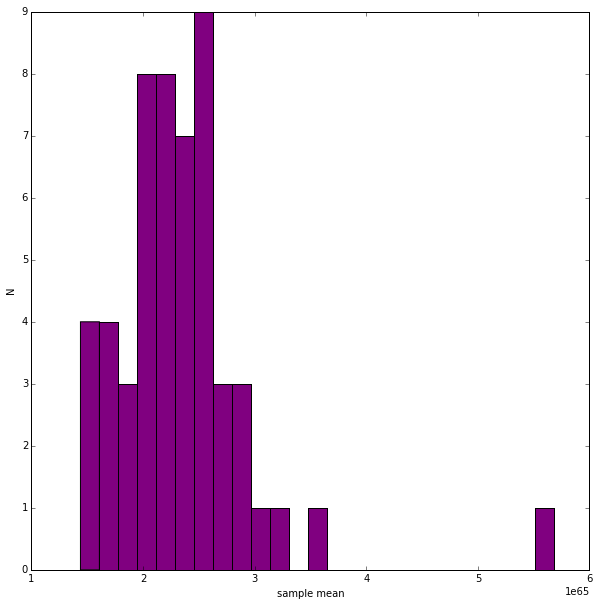

In [208]:
allmeans=[]
for n in means['logn']:
    allmeans.append(means['logn'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=25, color='purple')
pl.xlabel('sample mean')
pl.ylabel('N')

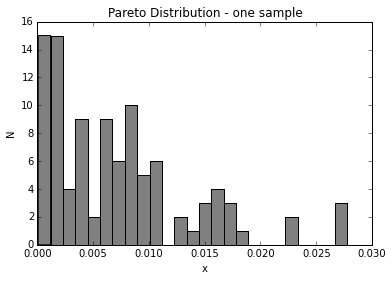

In [213]:
# a PARETO distribution (6/6)
md['par'] = np.random.pareto(pmean, size=100) 
pl.hist(md['par'], bins=25, color = 'gray')
pl.title ('Pareto Distribution - one sample')
pl.ylabel('N')
pl.xlabel('x')

In [214]:
print ("Pareto Mean: %.2f, standard deviation: %.2f"%(md['par'].mean(), md['par'].std())) 

Pareto Mean: 0.01, standard deviation: 0.01


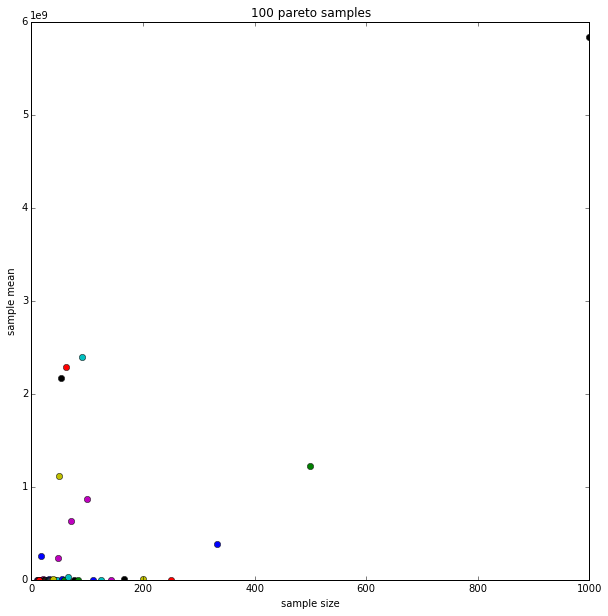

In [218]:
md['par']={} 

for n in mysize:
    md['par'][n] = np.random.pareto(.25, size=n)
    
means = {}
means['par'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axpar_mu_n = fig_mu_N.add_subplot(111)
for nn in md['par'].iterkeys():
    means['par'][nn] = md['par'][nn].mean()
    # plot it
    axpar_mu_n.plot(nn, means['par'][nn], 'o')
    axpar_mu_n.set_xlabel('sample size')
    axpar_mu_n.set_ylabel('sample mean')
    axpar_mu_n.set_title ('100 pareto samples')
    axpar_mu_n.plot([min(mysize), max(mysize)],[xdf, xdf], 'k')

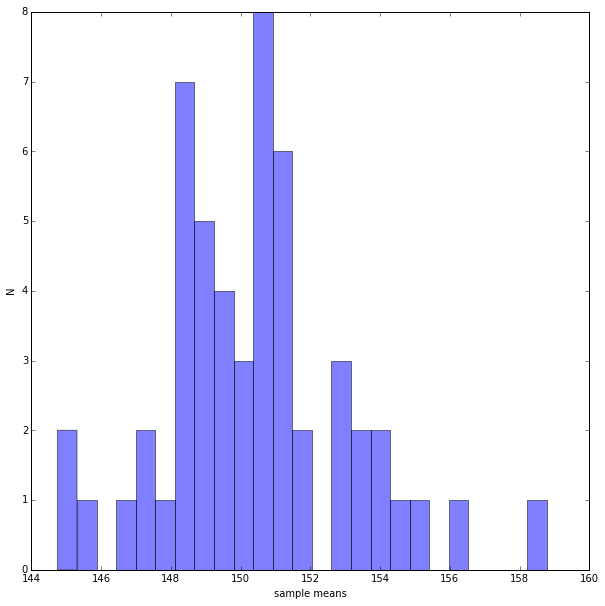

In [319]:
# all sample means distributions put together on one histogram
# use 'allmeans' variable created during individual distributions and loop through
allmeans=[]
for d in means:
    for n in means[d]:
        allmeans.append(means[d][n])
    
pl.figure(figsize=(10,10))
pl.hist(allmeans, alpha=0.5, bins=25)
pl.xlabel('all sample means')
pl.ylabel('N')

In [314]:
# hw3 - assignment 2

#import packages not used in part 1
import sys


Null Hypothesis:  the % of former prisoners ever employed in an unsubsidized job after release is the same for candidates who participated in the program as for the control group, significance level p=0.05

P_zero - P_one = 0

In [294]:
p_zero = .521
p_one = .533
alpha = .05

n_0=409
n_1=564

Nt_0=p_zero*n_0
Nt_1=p_zero*n_1

In [289]:
#define the sample proportion first
sp=(p_zero*n_0+p_one*n_1)/(n_1+n_0)
print (sp)

0.527955806783


In [290]:
sp_stdev= lambda p, n: np.sqrt( p * ( 1 - p ) /n[0] +  p * ( 1 - p )/n[1]  )


sp_stdev_2y=sp_stdev((Nt_0+Nt_1)/(n_0+n_1),[n_0,n_1])
print (p_zero, n_0, n_1, sp_stdev_2y)

0.521 409 564 0.0324445557931


In [292]:
zscore = lambda p0, p1, s : (p0-p1)/s
z_2y = zscore(p_one, p_zero, sp_stdev_2y)
print (z_2y)

0.369861744341


In [313]:
p_2y=1-0.6368


def report_result(p,a):
    print ('is the p value {0:.2f} smaller than the critical value {1:.2f}? ')
    if p<a:
        print ("YES!")
    else: print ("NO!")
    
    print ('the Null Hypothesis is') 
    print ('rejected' if p<a  else 'not rejected') 

    
report_result(p_2y, alpha)

is the p value {0:.2f} smaller than the critical value {1:.2f}? 
NO!
the Null Hypothesis is
not rejected


Do not reject the null hypothesis that there is a difference between the program and control groups

In [300]:
# Chi-Squared test for employment for six consesecutie quarters - null hypothesis is that the employment rates for the program 
# group is equal to the control group for employment of six consecutive quarters

Ntot = 973
expected = 564*409*131.579*841.429
sample_values = [[.147*564,.853*564],[.119*409,.881*409]]
 
chisqstat= lambda N, values, expect : N*((values[0][0]*values[1][1]-values[0][1]*values[1][0])**2)/(expect)

print (chisqstat(Ntot,  sample_values, expected))

1.58937822056


Because Chi-squared is 1.5894 and that is less tha 3.84 (df=1, significance level=.05), we do not reject the null hypothesis that the six month consesecutive employment rate is different between the prgram group and the control group.